In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

In [2]:
# creating our data points for this example, and using some floats.
x = list(range(3, 33)) + [3.2, 6.2]
y = [1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,8,2,13]

In [3]:
# lowess will return our "smoothed" data with a new y-value at every x-value that fits the curve.
#frac is the fraction (between 0-1) of the data used when estimating the y-value. Lower = tighter fit.
lowess = sm.nonparametric.lowess(y, x, frac=.5)

In [4]:
# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [5]:
# run scipy's interpolation (we are injecting the new data points into the data)
f = interp1d(lowess_x, lowess_y, bounds_error=False)

In [6]:
xnew = [i/10. for i in range(400)]

In [7]:
# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)

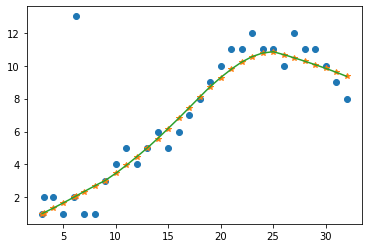

In [8]:
plt.plot(x, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()